In [1]:
# Load Libraries & Functions
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

from src.gen_dataset import gen_dataset
from src.models import gaussian, kde, lowess
from src.helpers.process import convert_ed

In [2]:
bounds = np.load('./dataset/bounds.npy')
transients = np.load('./dataset/trans.npy')
bds_ori = bounds[0, :].copy()
trs_ori = transients[0, :].copy()

bounds, transients = gen_dataset(32)
bds_gen = bounds[0, :].copy()
trs_gen = transients[0, :].copy()

In [3]:
# Show fun difference between datasets
print('Original Dataset:')
print(f'Bins: {len(bds_ori)+1} | Sum: {np.sum(trs_ori)} | Laser Resolution: {len(trs_ori)} | Ambient Light: {stats.mode(trs_ori)}')
print('Generated Dataset:')
print(f'Bins: {len(bds_gen)+1} | Sum: {np.sum(trs_gen)} | Laser Resolution: {len(trs_gen)} | Ambient Light: {stats.mode(trs_gen)}')

Original Dataset:
Bins: 32 | Sum: 210.03233286690391 | Laser Resolution: 100000 | Ambient Light: 0.0011
Generated Dataset:
Bins: 32 | Sum: 1.0 | Laser Resolution: 100000 | Ambient Light: 5e-06


# Comparisons

Text(0.5, 1.0, 'EDH | Bins: 32 | Laser Resolution: 100000 | Cycles: 1 | Scene Depth: 2.5 m')

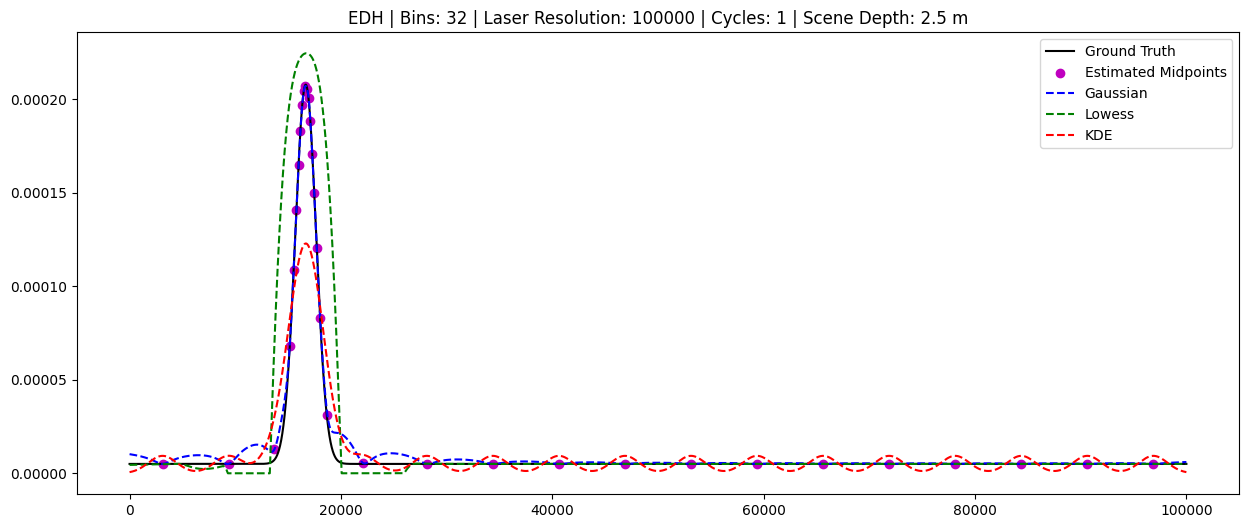

In [4]:
# Set constants
BINS = 32 # Equi-depth bin count
CYCLES = 1 # Number of laser cycles
RES = 100000 # Resolution of laser (or # of steps during exposure time)
DEPTH = 2.5 # depth of the scene (in meters)
AMBIENT_STEP = 0.5 # Number of ambient photons added per laser cycle

bds, trs = gen_dataset(bins=BINS, cycles=CYCLES, resolution=RES, scene_depth=DEPTH, ambient_step=AMBIENT_STEP)
proc_bds, proc_trs = convert_ed(bds.copy(), trs.copy(), len(trs), stats.mode(trs))
x_test = np.arange(0, len(trs))

plt.figure(figsize=(15,6))
# ax = plt.gca()
# ax.set_ylim([0, np.max(trs)])
plt.plot(x_test, trs, 'k', label='Ground Truth')
plt.scatter(proc_bds, proc_trs, color='m', label='Estimated Midpoints')

plt.plot(x_test, gaussian.regression_fit(proc_bds, proc_trs, x_test), 'b', linestyle='--', label='Gaussian')
plt.plot(x_test, lowess.regression_fit(proc_bds, proc_trs, x_test), 'g', linestyle='--', label='Lowess')
plt.plot(x_test, kde.regression_fit(proc_bds, proc_trs, x_test), 'r', linestyle='--', label='KDE')

plt.legend()
plt.title(f'EDH | Bins: {BINS} | Laser Resolution: {RES} | Cycles: {CYCLES} | Scene Depth: {DEPTH} m')